In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [18]:
X_train = pd.read_csv('Data/Train_Test/X_train.csv').to_numpy()
y_train = pd.read_csv('Data/Train_Test/y_train.csv').to_numpy()
X_test = pd.read_csv('Data/Train_Test/X_test.csv').to_numpy()
y_test = pd.read_csv('Data/Train_Test/y_test.csv').to_numpy()

In [19]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
print("Coefficient of determination R^2 <-- on train set: {}".format(rf.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9160695206692853


In [21]:
print("Coefficient of determination R^2 <-- on test set: {}".format(rf.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.32740970005075076


In [22]:
mse = cross_val_score(rf,X_train,y_train,cv=5)
mean_mse = mse.mean()
print(mean_mse)

0.3847595718564312


In [23]:
pred = rf.predict(X_test)

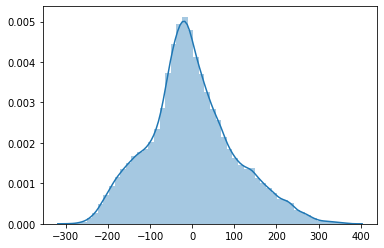

In [24]:
sns.distplot(y_test-pred)

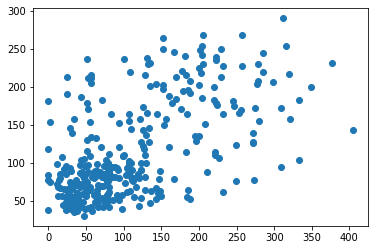

In [25]:
plt.scatter(y_test,pred)

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 49.04437084592145
MSE: 4588.520764636684
RMSE: 67.73862092364062


### Hyperparameter tunning using Random Forest 

In [13]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
#Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5, 10]

bootstrap = [True, False]


In [28]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [29]:
rf = RandomForestRegressor()
random_regressor = RandomizedSearchCV(rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,cv = 5,verbose=2,random_state=2,n_jobs=1)

In [31]:
random_regressor.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.0s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.4s
[CV] n_estimators=300, min_samples_split=10

[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15, total=   0.4s
[CV] n_estimators=800, mi

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=300, min_samples_split=15,

[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=5,

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.9s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   2.0s
[CV] n_estimators=1200, min_samples_split=10

[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.1s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=900, min_samples_split=15, min_s

[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.5s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=

[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=20, total=   1.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.8s
[CV] n_estimators=400, min_samples_split=5, min_

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.6s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samp

[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.6s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.9s
[CV] n_estimators=500, min_samples_split=2, min

[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.6s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.6s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.5s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=700, min_samples_split=100, min_sampl

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.2s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.2s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.3s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.3s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.2s
[CV] n_estimators=200, min_samples_split=2, min_samp

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  8.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [32]:
random_regressor.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [34]:
random_regressor.best_score_

-3785.0960810517718

In [35]:
pred = random_regressor.predict(X_test)

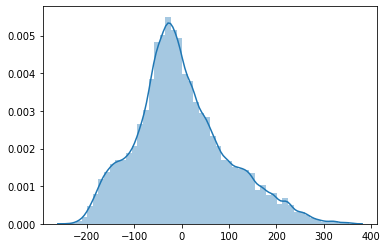

In [36]:
sns.distplot(y_test-pred)

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 47.00931831922556
MSE: 4186.091821562066
RMSE: 64.70001407698507


In [38]:
# open a file, where you ant to store the data
file = open('Random_forest_regressor.pkl', 'wb')

# dump information to that file
pickle.dump(random_regressor, file)